## Visualizing Results of the Deletion Capacity Experiment

These are the results of the deletion capacity experiment. 

At a high level, we're seeing very conservative regret bounds for the Memory Pair. This means that we're requiring large sample complexity in return for a very low deletion capacity.

It's also worth noting that our sample complexity (bar for a good learner) increases as the data wiggles more. When the Lipschitz constant and upper-bound on the Hessian are high, the sample complexity jumps and the amount of noise injected to the model becomes destabilizingly high.

Goals:
- Analyze the simulation results from the experiment runs and visualize the cumulative regret
- Focus on $\widehat{G}$ such that we can see its impact on the downstream stability of the learner
- Investigate alternative methods of privacy accounting. Can we get tigheter regret bounds such that we don't inject so much noise into the parameter estimates.

In [1]:
import pandas as pd
data = pd.read_csv("/workspaces/unlearning-research-meta/experiments/deletion_capacity/results/grid_2025_01_01/sweep/all_runs.csv")

In [2]:
set(data.op)

{'calibrate', nan, 'warmup'}

The data is at a very granular level, which will make analysis fun.

The code performs a grid search over the experiment parameters. For each seed, a memory pair is trained to its theoretical sample complexity (after an initial calibration period). Once the warmup is complete, the model is tasked with a series of deletions. The goal is to evaluate the impact of unlearning on the model's regret convergence. 

The conservative bounds of the traditional $(\varepsilon,\delta)$-certified unlearning method makes it a difficult task. The conservative accountant assumes that every deletion is of the worst-possible sensitivity, and so an unsustainable amount of noise is added to the Newton Step.

In [3]:
split = data[data["grid_id"] == "split_0.9-0.1_q0.95_k10_legacy_eps0.5"]

In [10]:
split.columns

split[["event", "op", "regret", "N_star_emp"]]

,event,op,regret,N_star_emp
0,0.0,calibrate,0.000000,NaN
1,1.0,calibrate,0.000000,NaN
2,2.0,calibrate,0.000000,NaN
3,3.0,calibrate,0.000000,NaN
4,4.0,calibrate,0.000000,NaN
...,...,...,...,...
4750,995.0,warmup,146.215876,NaN
4751,996.0,warmup,146.215913,NaN
4752,997.0,warmup,146.229286,NaN
4753,998.0,warmup,146.229900,NaN


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

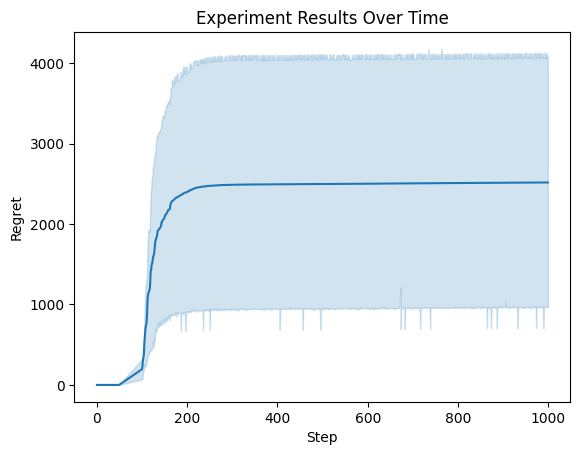

In [6]:
# Plotting the data
sns.lineplot(data=split, x="event", y="regret")
plt.title("Experiment Results Over Time")
plt.xlabel("Step")
plt.ylabel("Regret")
plt.show()

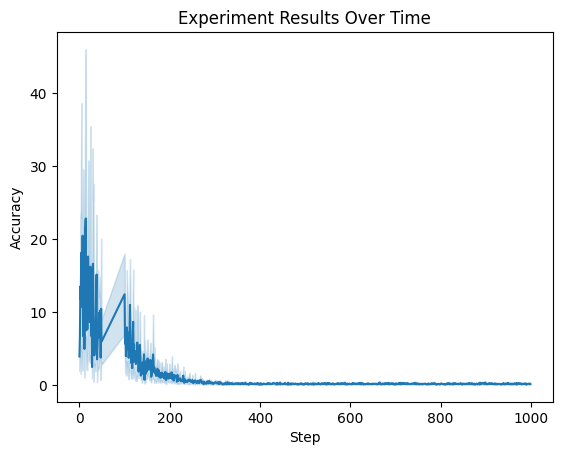

In [7]:
sns.lineplot(data=split, x="event", y="acc")
plt.title("Experiment Results Over Time")
plt.xlabel("Step")
plt.ylabel("Accuracy")
plt.show()

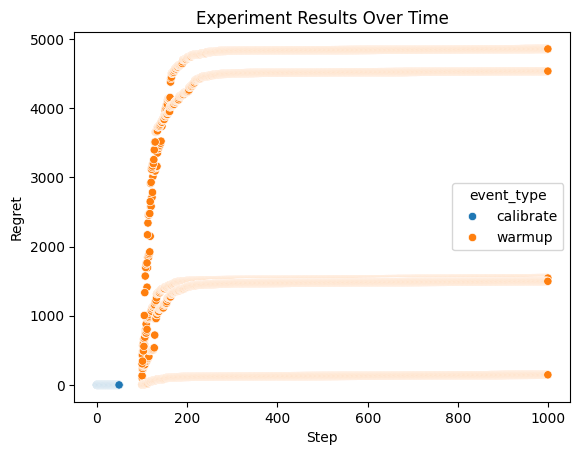

In [8]:
# plot a scatter plot of step vs regret colored by event type
sns.scatterplot(data=split, x="event", y="regret", hue="event_type")
plt.title("Experiment Results Over Time")
plt.xlabel("Step")
plt.ylabel("Regret")
plt.show()